In [105]:
import site
site.addsitedir('D:\\Program Files\\opencv-4.3.0-dldt-2020.2-vc16-avx2\\opencv\\build\\python')
import cv2
import numpy as np
from matplotlib import pyplot as plt

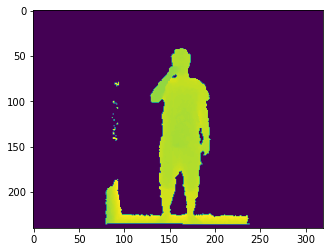

(array([  0, 255], dtype=uint8), array([67475,  9325], dtype=int64))

In [116]:
frame = cv2.imread('robot-person1/0512164529/Depth_1.png', cv2.IMREAD_ANYDEPTH)
frame = frame[:424, :512]
seg_mask = cv2.inRange(frame, 2000, 2500)
frame2 = cv2.bitwise_and(frame, frame, mask=seg_mask)
plt.imshow(frame2)
plt.show()
np.unique(seg_mask, return_counts=True)

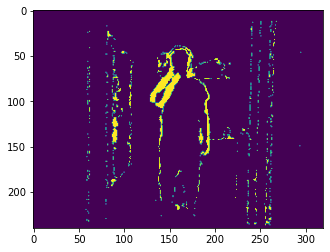

(array([  0, 255], dtype=uint8), array([74273,  2527], dtype=int64))

In [117]:
background = cv2.imread('robot-person1/bg.png', cv2.IMREAD_ANYDEPTH)
background = background[:424, :512]
sub_mask = np.uint8(cv2.threshold(cv2.absdiff(background, frame), 100, 255, cv2.THRESH_BINARY)[1])
frame2 = cv2.bitwise_and(frame, frame, mask=sub_mask)
plt.imshow(sub_mask)
plt.show()
np.unique(sub_mask, return_counts=True)

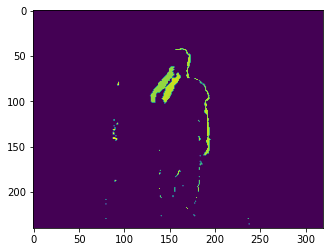

In [118]:
mask = cv2.bitwise_and(seg_mask, sub_mask)
frame2 = cv2.bitwise_and(frame, frame, mask=mask)
plt.imshow(frame2)
plt.show()

In [109]:
binimg = np.uint8(cv2.threshold(frame2, 1, 255, cv2.THRESH_BINARY)[1])
_, labels, _, centroids = cv2.connectedComponentsWithStats(binimg)
stats = np.unique(labels, return_counts=True)[1]
indices = np.delete(np.argsort(stats)[::-1], 0)
# indices = np.argsort(stats)[::-1]
idx = -1
for i in indices:
    if centroids[i][1] < len(binimg) / 3:
        # i think its the shadow at the high-end of the image...
        print('found upper shadow at idx=', i)
    elif stats[i] < 5000:
        print('found noise at idx=', i)
    else:
        idx = i
        break
if idx < 0:
    print('nothing found')
idx, stats[idx] if idx>0 else -1

(1, 17960)

(array([  0, 255], dtype=uint8), array([199128,  17960], dtype=int64))


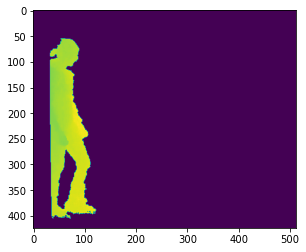

In [110]:
import numpy.ma as ma
con_mask = np.uint8((labels==idx).astype(int))
con_mask[con_mask == 1] = 255
print(np.unique(con_mask, return_counts=True))
mask2 = cv2.bitwise_and(mask, con_mask)
newimg2 = cv2.bitwise_and(frame2, frame2, mask=mask2)
plt.imshow(newimg2)
plt.show()

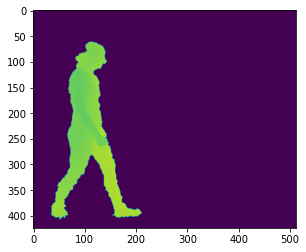

In [113]:
x = np.load('datasets/P005S-Post-14-12-03_trail-002.npy')
plt.imshow(x[10].reshape(424, 512))
plt.show()